In [2]:
from pandas_datareader.data import DataReader
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import dataframe_image as dfi

# Get Stock Prices using pandas_datareader Library

In [18]:
RMSE = pd.read_excel('/Users/edgarsicat/Documents/PT/Thesis/df_maeV6.xlsx')

In [21]:
RMSE = RMSE.sort_values(by='RMSE', ascending=True)
RMSE

,Asset,RMSE
151,DIA-USD,3.513034e-09
140,NMR-USD,5.138633e-09
172,INJ-USD,5.346051e-09
141,DOT-USD,6.144499e-09
174,CTK-USD,6.194943e-09
...,...,...
146,TRB-USD,3.385725e-04
27,BAT-USD,3.591551e-04
83,OGN-USD,3.887908e-04
54,MFT-USD,4.485148e-04


In [24]:
lowRMSE_symb = RMSE["Asset"][0:50].values
lowRMSE_symb

array(['DIA-USD', 'NMR-USD', 'INJ-USD', 'DOT-USD', 'CTK-USD', 'STRAX-USD',
       'SRM-USD', 'AUDIO-USD', 'NBS-USD', 'SOL-USD', 'XVS-USD',
       'RUNE-USD', 'UMA-USD', 'UTK-USD', 'EGLD-USD', 'FLM-USD',
       'REEF-USD', 'LTO-USD', 'BNT-USD', 'OXT-USD', '-USDBRL', 'YFII-USD',
       'KSM-USD', 'OG-USD', 'FET-USD', 'AAVE-USD', 'COTI-USD', 'ARPA-USD',
       'NEAR-USD', 'FIO-USD', 'UNFI-USD', 'DOGE-USD', 'PSG-USD',
       'ONT-USD', 'ALGO-USD', 'ORN-USD', 'FTM-USD', 'CRV-USD', 'RVN-USD',
       'SNX-USD', 'IOTX-USD', 'COS-USD', 'GRT-USD', 'BAND-USD',
       'MATIC-USD', 'SXP-USD', 'SUSHI-USD', 'REN-USD', 'DASH-USD',
       'HARD-USD'], dtype=object)

In [41]:
highRMSE = RMSE["Asset"][-50:].values
highRMSE

array(['COMP-USD', 'MTL-USD', 'TUSD-USD', 'KMD-USD', 'BNB-USD',
       'KAVA-USD', 'TRX-USD', 'ARDR-USD', 'TOMO-USD', 'KEY-USD',
       'MANA-USD', '-USDBIDR', 'TCT-USD', 'ZEC-USD', 'NANO-USD',
       'STPT-USD', 'ONG-USD', 'NULS-USD', 'ATM-USD', 'TROY-USD',
       'FTT-USD', 'BTC-USD', 'ONE-USD', 'CTXC-USD', 'PNT-USD', 'NEO-USD',
       'AUD-USD', 'BUSD-USD', 'CELR-USD', 'QTUM-USD', 'FIL-USD',
       'USDC-USD', 'IOST-USD', 'ETC-USD', '-USDDAI', 'EOS-USD', 'ETH-USD',
       'ADA-USD', 'ICX-USD', 'FUN-USD', 'LTC-USD', '-USDTRY', 'DUSK-USD',
       'PERL-USD', 'OCEAN-USD', 'TRB-USD', 'BAT-USD', 'OGN-USD',
       'MFT-USD', 'GXS-USD'], dtype=object)

In [105]:
start_date = '2019/12/31' 
end_date = '2021/06/29'

#tickers = ['BAND-USD', 'THETA-USD', 'DATA-USD', 'EOS-USD', 'COS-USD']
tickers = ['ETH-USD', 'ADA-USD', 'ICX-USD', 'FUN-USD', 'LTC-USD']
stocks_df = DataReader(lowRMSE_symb, 'yahoo', start = start_date, end = end_date)['Close']
stocks_df

/Users/edgarsicat/miniforge3/envs/native/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning:

Failed to read symbol: '-USDBRL', replacing with NaN.



Symbols,DIA-USD,NMR-USD,INJ-USD,DOT-USD,CTK-USD,STRAX-USD,SRM-USD,AUDIO-USD,NBS-USD,SOL-USD,...,COS-USD,GRT-USD,BAND-USD,MATIC-USD,SXP-USD,SUSHI-USD,REN-USD,DASH-USD,HARD-USD,-USDBRL
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,NaN,6.550330,NaN,NaN,NaN,0.344410,NaN,NaN,NaN,NaN,...,0.009391,NaN,0.239964,0.014396,1.086872,NaN,0.031802,42.574841,NaN,NaN
2019-12-31,NaN,6.340034,NaN,NaN,NaN,0.317752,NaN,NaN,NaN,NaN,...,0.009237,NaN,0.221335,0.013807,1.190825,NaN,0.030907,41.195194,NaN,NaN
2020-01-01,NaN,6.362642,NaN,NaN,NaN,0.309279,NaN,NaN,NaN,NaN,...,0.009351,NaN,0.235566,0.014962,1.335878,NaN,0.031987,41.865791,NaN,NaN
2020-01-02,NaN,6.241478,NaN,NaN,NaN,0.302303,NaN,NaN,NaN,NaN,...,0.008918,NaN,0.218406,0.014651,1.370233,NaN,0.035278,40.223259,NaN,NaN
2020-01-03,NaN,6.470068,NaN,NaN,NaN,0.299428,NaN,NaN,NaN,NaN,...,0.009333,NaN,0.231677,0.015194,1.356180,NaN,0.035537,44.021961,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,1.099123,26.838961,5.512323,14.467696,0.828796,1.187383,2.691620,0.658281,0.010869,28.698862,...,0.010441,7.631976,5.090703,1.046163,1.710007,6.314826,0.341189,120.758003,0.704134,NaN
2021-06-26,1.106046,27.178196,5.364519,14.499612,0.869970,1.241205,2.687116,0.708422,0.010514,29.712854,...,0.010333,7.675266,4.901526,1.075453,1.742286,6.825348,0.333773,124.379852,0.672386,NaN
2021-06-27,1.144708,28.427479,5.799432,15.015594,0.908828,1.281685,2.855861,0.745414,0.011438,31.929392,...,0.011140,8.310267,5.156020,1.112033,1.864433,7.110858,0.349022,127.001213,0.765740,NaN


In [106]:
stocks_df = stocks_df.dropna(axis='columns')
high3 = stocks_df.iloc[: , 0:3]
high3

Symbols,NMR-USD,STRAX-USD,RUNE-USD
Date,,,
2019-12-30,6.550330,0.344410,0.062597
2019-12-31,6.340034,0.317752,0.070835
2020-01-01,6.362642,0.309279,0.075381
2020-01-02,6.241478,0.302303,0.078463
2020-01-03,6.470068,0.299428,0.078387
...,...,...,...
2021-06-25,26.838961,1.187383,5.424527
2021-06-26,27.178196,1.241205,5.383113
2021-06-27,28.427479,1.281685,6.076204


In [107]:
stocks_df = stocks_df.dropna(axis='columns')
low3 = stocks_df.iloc[: , -3:]
low3

Symbols,SXP-USD,REN-USD,DASH-USD
Date,,,
2019-12-30,1.086872,0.031802,42.574841
2019-12-31,1.190825,0.030907,41.195194
2020-01-01,1.335878,0.031987,41.865791
2020-01-02,1.370233,0.035278,40.223259
2020-01-03,1.356180,0.035537,44.021961
...,...,...,...
2021-06-25,1.710007,0.341189,120.758003
2021-06-26,1.742286,0.333773,124.379852
2021-06-27,1.864433,0.349022,127.001213


In [108]:
frames = [low3, high3]

result = pd.concat(frames, axis=1)

Symbols,SXP-USD,REN-USD,DASH-USD,NMR-USD,STRAX-USD,RUNE-USD
Date,,,,,,
2019-12-30,1.086872,0.031802,42.574841,6.550330,0.344410,0.062597
2019-12-31,1.190825,0.030907,41.195194,6.340034,0.317752,0.070835
2020-01-01,1.335878,0.031987,41.865791,6.362642,0.309279,0.075381
2020-01-02,1.370233,0.035278,40.223259,6.241478,0.302303,0.078463
2020-01-03,1.356180,0.035537,44.021961,6.470068,0.299428,0.078387
...,...,...,...,...,...,...
2021-06-25,1.710007,0.341189,120.758003,26.838961,1.187383,5.424527
2021-06-26,1.742286,0.333773,124.379852,27.178196,1.241205,5.383113
2021-06-27,1.864433,0.349022,127.001213,28.427479,1.281685,6.076204


In [109]:
stocks_df = result

In [19]:
start_date = '2019/12/31' 
end_date = '2021/06/29'

tickers = ['ANT-USD', 'FUN-USD', 'DOCK-USD', 'WAN-USD', 'CHZ-USD']
#assets = ['IOST-USD', 'BTC-USD', 'TOMO-USD', 'WAVES-USD', 'ONG-USD']
stocks_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)['Close']
stocks_df

Symbols,ANT-USD,FUN-USD,DOCK-USD,WAN-USD,CHZ-USD
Date,,,,,
2019-12-30,0.419570,0.003244,0.007027,0.172058,0.006871
2019-12-31,0.400772,0.003202,0.007958,0.171877,0.007087
2020-01-01,0.393751,0.003307,0.007782,0.175357,0.006654
2020-01-02,0.381212,0.003239,0.007050,0.172518,0.006654
2020-01-03,0.402710,0.003338,0.007351,0.179391,0.007224
...,...,...,...,...,...
2021-06-25,3.276410,0.016208,0.062387,0.503556,0.226349
2021-06-26,3.412748,0.016419,0.061793,0.514222,0.231372
2021-06-27,3.513676,0.016695,0.063276,0.529996,0.238485


In [110]:
fig_price = px.line(stocks_df, title='Price of Individual Stocks', log_y=True)
fig_price.show()

In [111]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns

Symbols,SXP-USD,REN-USD,DASH-USD,NMR-USD,STRAX-USD,RUNE-USD
Date,,,,,,
2019-12-31,0.095644,-0.028143,-0.032405,-0.032105,-0.077402,0.131604
2020-01-01,0.121809,0.034944,0.016279,0.003566,-0.026665,0.064177
2020-01-02,0.025717,0.102886,-0.039233,-0.019043,-0.022556,0.040886
2020-01-03,-0.010256,0.007342,0.094440,0.036624,-0.009510,-0.000969
2020-01-04,0.045797,0.004305,0.055198,0.038391,0.040891,0.112557
...,...,...,...,...,...,...
2021-06-25,-0.104296,-0.033139,-0.078498,-0.062807,-0.095508,-0.147810
2021-06-26,0.018877,-0.021736,0.029993,0.012640,0.045328,-0.007635
2021-06-27,0.070107,0.045687,0.021075,0.045966,0.032613,0.128753


In [112]:
daily_returns_and_norm = daily_returns
basic_stats = daily_returns.describe()
basic_stats

Symbols,SXP-USD,REN-USD,DASH-USD,NMR-USD,STRAX-USD,RUNE-USD
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.009202,0.008381,0.004772,0.008636,0.006090,0.012810
std,0.155991,0.087021,0.073484,0.133589,0.081956,0.092225
min,-0.698875,-0.489685,-0.372153,-0.420269,-0.488857,-0.425036
25%,-0.038500,-0.041849,-0.025166,-0.035760,-0.032694,-0.043188
50%,-0.002040,0.004059,0.002881,-0.000859,0.001083,0.004654
75%,0.047801,0.052050,0.030708,0.028917,0.042193,0.067335
max,2.802201,0.447934,0.570359,1.728222,0.667034,0.392946


In [11]:
daily_returns_and_norm['ADA-NORM'] = np.random.normal(np.mean(daily_returns_and_norm['ADA-USD']), np.std(daily_returns_and_norm['ADA-USD']), size=len(daily_returns_and_norm))
daily_returns_and_norm["BNB-NORM"] = np.random.normal(np.mean(daily_returns_and_norm["BNB-USD"]), np.std(daily_returns_and_norm["BNB-USD"]), size=len(daily_returns_and_norm))
daily_returns_and_norm['BTC-NORM'] = np.random.normal(np.mean(daily_returns_and_norm['BTC-USD']), np.std(daily_returns_and_norm['BTC-USD']), size=len(daily_returns_and_norm))
daily_returns_and_norm['ETH-NORM'] = np.random.normal(np.mean(daily_returns_and_norm['ETH-USD']), np.std(daily_returns_and_norm['ETH-USD']), size=len(daily_returns_and_norm))
daily_returns_and_norm['XRP-NORM'] = np.random.normal(np.mean(daily_returns_and_norm['XRP-USD']), np.std(daily_returns_and_norm['XRP-USD']), size=len(daily_returns_and_norm))

KeyError: 'ADA-USD'

In [8]:
for i, crp in enumerate(assets):
    print('{} Skeness is: {} and excess Kurtosis(>3): {}'.format(crp, round(skew(daily_returns_and_norm.iloc[:, i].values),2) , round(kurtosis(daily_returns_and_norm.iloc[:, i].values),2) ))

ADA-USD Skeness is: 0.25 and excess Kurtosis(>3): 4.36
BNB-USD Skeness is: 1.66 and excess Kurtosis(>3): 21.63
BTC-USD Skeness is: -1.01 and excess Kurtosis(>3): 13.18
ETH-USD Skeness is: -0.71 and excess Kurtosis(>3): 8.83
XRP-USD Skeness is: 1.32 and excess Kurtosis(>3): 12.7


In [9]:
Skew = []
for i, crp in enumerate(assets):
    Skew.append(round(skew(daily_returns_and_norm[crp].values),2))
Kurt = []
for i, crp in enumerate(assets):
    Kurt.append(round(kurtosis(daily_returns_and_norm[crp].values)-3,2))

In [11]:
basic_stats.loc["Skewness"] = Skew
basic_stats.loc["Kurtosis"] = Kurt
#dfi.export(basic_stats.round(2), "Basic Stat2.png")
basic_stats.round(2)

Symbols,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
count,547.00,547.00,547.00,547.00,547.00
mean,0.01,0.01,0.00,0.01,0.01
std,0.07,0.07,0.04,0.06,0.08
min,-0.40,-0.42,-0.37,-0.42,-0.42
25%,-0.02,-0.02,-0.01,-0.02,-0.02
50%,0.01,0.00,0.00,0.01,0.00
75%,0.04,0.03,0.02,0.03,0.03
max,0.32,0.70,0.19,0.26,0.56
Skewness,0.25,1.66,-1.01,-0.71,1.32
Kurtosis,1.36,18.63,10.18,5.83,9.70


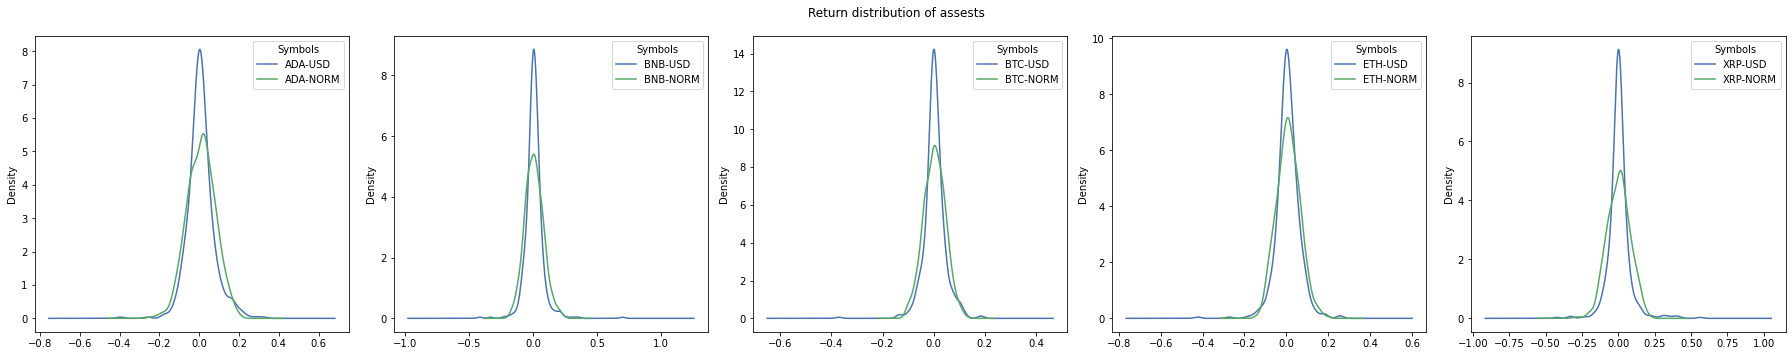

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,5))
daily_returns_and_norm[["ADA-USD", "ADA-NORM"]].plot.kde(ax=axes[0])
daily_returns_and_norm[["BNB-USD", "BNB-NORM"]].plot.kde(ax=axes[1])
daily_returns_and_norm[["BTC-USD", "BTC-NORM"]].plot.kde(ax=axes[2])
daily_returns_and_norm[["ETH-USD", "ETH-NORM"]].plot.kde(ax=axes[3])
daily_returns_and_norm[["XRP-USD", "XRP-NORM"]].plot.kde(ax=axes[4])
fig.suptitle('Return distribution of assests')
fig.tight_layout()
#plt.savefig("Crypto Distributions.png")

In [113]:
fig = px.line(daily_returns, title='Daily Returns')
fig.show()

In [114]:
daily_returns.std()

Symbols
SXP-USD      0.155991
REN-USD      0.087021
DASH-USD     0.073484
NMR-USD      0.133589
STRAX-USD    0.081956
RUNE-USD     0.092225
dtype: float64

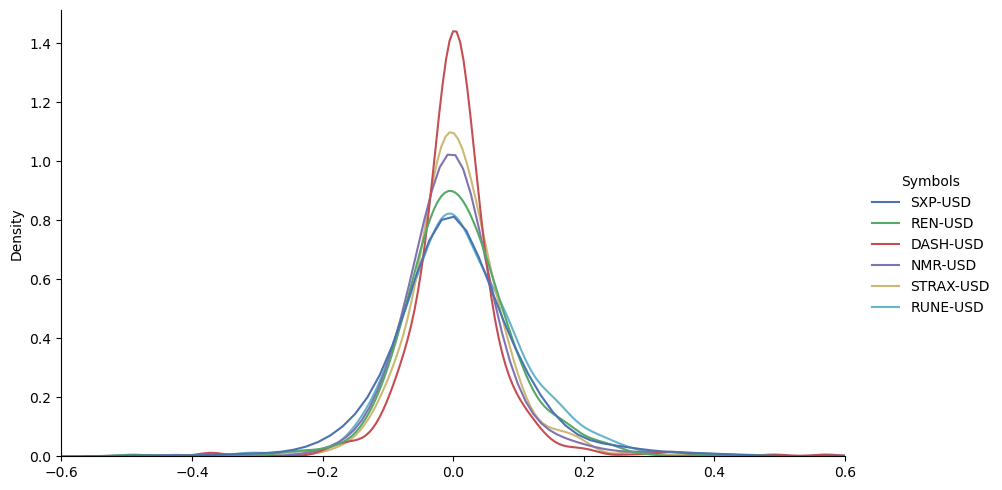

In [115]:
sns.displot(data=daily_returns, kind = 'kde', aspect = 1.75)
plt.xlim(-0.6, 0.6)
plt.savefig("Assets Distib.png")

In [116]:
daily_returns.std()*np.sqrt(252)

Symbols
SXP-USD      2.476283
REN-USD      1.381419
DASH-USD     1.166527
NMR-USD      2.120664
STRAX-USD    1.301007
RUNE-USD     1.464021
dtype: float64

In [117]:
daily_returns

Symbols,SXP-USD,REN-USD,DASH-USD,NMR-USD,STRAX-USD,RUNE-USD
Date,,,,,,
2019-12-31,0.095644,-0.028143,-0.032405,-0.032105,-0.077402,0.131604
2020-01-01,0.121809,0.034944,0.016279,0.003566,-0.026665,0.064177
2020-01-02,0.025717,0.102886,-0.039233,-0.019043,-0.022556,0.040886
2020-01-03,-0.010256,0.007342,0.094440,0.036624,-0.009510,-0.000969
2020-01-04,0.045797,0.004305,0.055198,0.038391,0.040891,0.112557
...,...,...,...,...,...,...
2021-06-25,-0.104296,-0.033139,-0.078498,-0.062807,-0.095508,-0.147810
2021-06-26,0.018877,-0.021736,0.029993,0.012640,0.045328,-0.007635
2021-06-27,0.070107,0.045687,0.021075,0.045966,0.032613,0.128753


In [118]:
def plot_cum_returns(data, title):    
    daily_cum_returns = (1 + data).cumprod()
    compounded = (daily_cum_returns -1)*100
    fig = px.line(compounded, title=title,log_y=False)
    return fig
    
fig_cum_returns = plot_cum_returns(daily_returns, 'Cumulative Returns of Crypto-assets in %')
fig_cum_returns.show()

In [119]:
corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Crypto-assets')
fig_corr.show()

In [120]:
# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)

print(mu)

Symbols
SXP-USD      0.328429
REN-USD      2.135313
DASH-USD     0.730070
NMR-USD      0.993695
STRAX-USD    1.014886
RUNE-USD     7.550210
dtype: float64


In [121]:
S

Symbols,SXP-USD,REN-USD,DASH-USD,NMR-USD,STRAX-USD,RUNE-USD
Symbols,,,,,,
SXP-USD,6.131979,1.359165,0.925517,3.034390,1.241362,1.343886
REN-USD,1.359165,1.908319,0.775790,1.090733,0.720357,1.056943
DASH-USD,0.925517,0.775790,1.360786,0.743297,0.588025,0.681760
NMR-USD,3.034390,1.090733,0.743297,4.497215,0.754893,0.930822
STRAX-USD,1.241362,0.720357,0.588025,0.754893,1.692619,0.647655
RUNE-USD,1.343886,1.056943,0.681760,0.930822,0.647655,2.143358


/Users/edgarsicat/miniforge3/envs/native/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:438: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



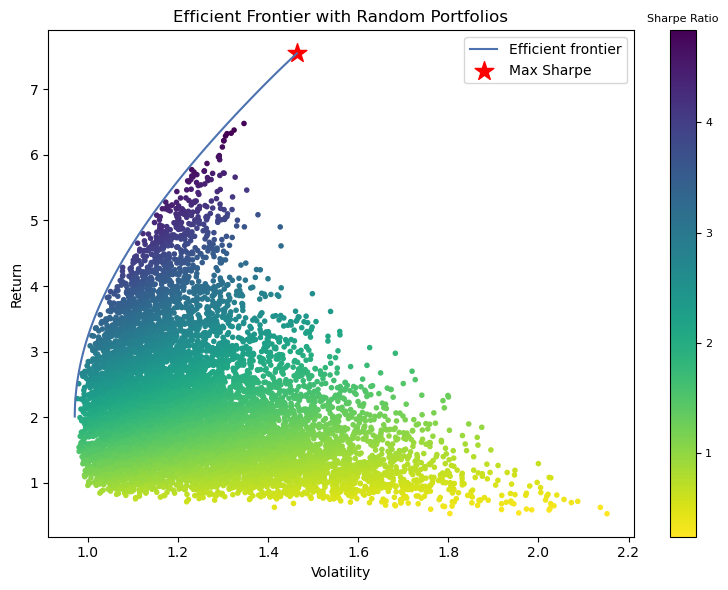

In [122]:
def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier(mu, S)

    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0)
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    f = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
    
    # Gradient label
    clb=plt.colorbar(f)
    clb.ax.tick_params(labelsize=8) 
    clb.ax.set_title('Sharpe Ratio',fontsize=8)

    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.savefig("Efficient Frontier Random Portfolios MSR.png")
    plt.show()
    
plot_efficient_frontier_and_max_sharpe(mu, S)

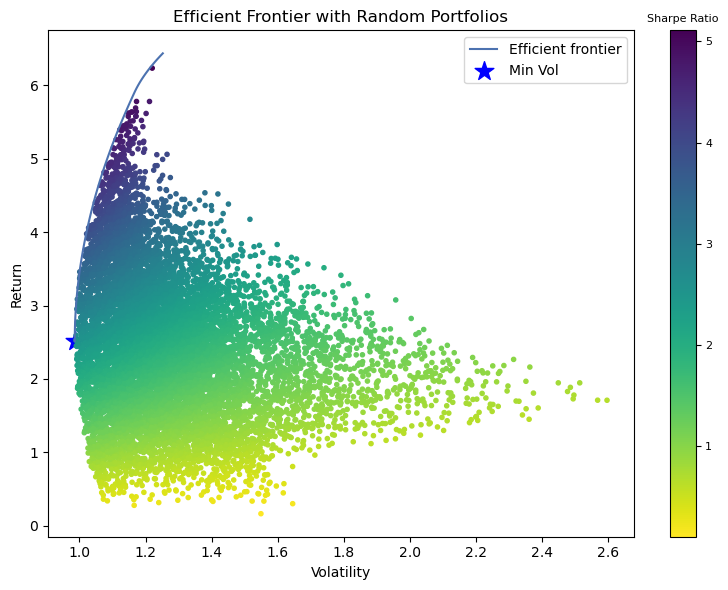

In [37]:
def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier(mu, S)

    fig, ax = plt.subplots(figsize=(8,6))
    ef_min_vol = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    ef_min_vol.min_volatility()
    ret_tangent, std_tangent, _ = ef_min_vol.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="b", label="Min Vol")

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    f = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Gradient label
    clb=plt.colorbar(f)
    clb.ax.tick_params(labelsize=8) 
    clb.ax.set_title('Sharpe Ratio',fontsize=8)
    
    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.savefig("Efficient Frontier Random Portfolios GMV.png")
    plt.show()
    
plot_efficient_frontier_and_max_sharpe(mu, S)

In [123]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0)
MSR_weights = ef.clean_weights()
print(MSR_weights)

OrderedDict([('SXP-USD', 0.0), ('REN-USD', 0.0), ('DASH-USD', 0.0), ('NMR-USD', 0.0), ('STRAX-USD', 0.0), ('RUNE-USD', 1.0)])


In [97]:
weights_df_MSR = pd.DataFrame.from_dict(MSR_weights, orient = 'index')
weights_df_MSR.columns = ['weights']
weights_df_MSR

,weights
BTC-USD,0.00000
ONE-USD,0.00000
CTXC-USD,0.00000
PNT-USD,0.00000
NEO-USD,0.00000
BUSD-USD,0.73330
CELR-USD,0.00000
QTUM-USD,0.00000
FIL-USD,0.01614
USDC-USD,0.00000


In [58]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()

print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

Expected annual return: 116.45%
Annual volatility: 26.83%
Sharpe ratio: 4.34


/Users/edgarsicat/miniforge3/envs/native/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:438: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



In [61]:
ef = EfficientFrontier(mu, S)
ef.min_volatility()
GMV_weights = ef.clean_weights()
print(GMV_weights)

OrderedDict([('BTC-USD', 0.01969), ('ONE-USD', 0.00188), ('CTXC-USD', 0.00102), ('PNT-USD', 0.0), ('NEO-USD', 0.0), ('BUSD-USD', 0.51712), ('CELR-USD', 0.0), ('QTUM-USD', 0.0), ('FIL-USD', 0.00042), ('USDC-USD', 0.45086), ('IOST-USD', 0.0), ('ETC-USD', 0.0), ('EOS-USD', 0.0), ('ETH-USD', 0.00508), ('ADA-USD', 0.0), ('ICX-USD', 0.0), ('FUN-USD', 0.00122), ('LTC-USD', 0.0), ('DUSK-USD', 0.0), ('PERL-USD', 0.0), ('OCEAN-USD', 0.0), ('TRB-USD', 0.00269), ('BAT-USD', 0.0), ('MFT-USD', 0.0)])


In [62]:
weights_df_GMV = pd.DataFrame.from_dict(GMV_weights, orient = 'index')
weights_df_GMV.columns = ['weights']
weights_df_GMV

,weights
BTC-USD,0.01969
ONE-USD,0.00188
CTXC-USD,0.00102
PNT-USD,0.00000
NEO-USD,0.00000
BUSD-USD,0.51712
CELR-USD,0.00000
QTUM-USD,0.00000
FIL-USD,0.00042
USDC-USD,0.45086


In [63]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()

print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

Expected annual return: 3.82%
Annual volatility: 6.72%
Sharpe ratio: 0.27


In [95]:
start_date = '2021/06/30' 
end_date = '2021/12/30'

tickers = ['ADA-USD', "BCH-USD", 'BNB-USD', 'BTC-USD', "LTC-USD", 'ETH-USD',  "UNI-USD", 'XRP-USD']
stocks_df_sim = DataReader(stocks_df.columns, 'yahoo', start = start_date, end = end_date)['Close']
stocks_df_sim

Symbols,BTC-USD,ONE-USD,CTXC-USD,PNT-USD,NEO-USD,BUSD-USD,CELR-USD,QTUM-USD,FIL-USD,USDC-USD,...,ADA-USD,ICX-USD,FUN-USD,LTC-USD,DUSK-USD,PERL-USD,OCEAN-USD,TRB-USD,BAT-USD,MFT-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,35867.777344,0.001587,0.148517,0.000081,34.914722,1.000120,0.030075,7.532893,64.280266,1.000066,...,1.368437,0.814098,0.017401,143.702911,0.123020,0.073700,0.453271,40.986240,0.584957,0.006958
2021-06-30,35040.835938,0.001606,0.156438,0.000085,36.580429,0.999985,0.029362,7.680137,60.372555,1.000089,...,1.383472,0.836260,0.016970,144.135834,0.117133,0.070297,0.460098,40.349342,0.613600,0.007344
2021-07-01,33572.117188,0.001565,0.152234,0.000086,34.244640,1.000151,0.026858,7.111755,56.826080,1.000192,...,1.335611,0.806187,0.016619,137.577530,0.111613,0.064060,0.439487,36.879810,0.582178,0.007795
2021-07-02,33897.046875,0.001563,0.154012,0.000086,35.492744,1.000083,0.026661,7.073248,57.194809,1.000035,...,1.394397,0.819442,0.016755,136.943695,0.117318,0.068166,0.438449,37.269943,0.580294,0.008526
2021-07-03,34668.546875,0.001562,0.153100,0.000089,36.342903,0.999800,0.028239,7.242975,58.858742,0.999984,...,1.406836,0.833267,0.017007,140.279694,0.132002,0.067001,0.445777,38.755039,0.588640,0.008531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50809.515625,0.001784,0.430772,0.000014,29.556227,0.999940,0.087230,9.922560,37.290997,0.999108,...,1.456045,1.540547,0.012347,155.992340,0.712408,0.088110,0.951231,38.951481,1.336697,0.009452
2021-12-27,50640.417969,0.001732,0.416334,0.000016,29.552681,0.998266,0.087222,9.996481,39.149315,0.999582,...,1.512913,1.553299,0.012776,155.881226,0.878804,0.096231,0.968853,39.559509,1.379804,0.009520
2021-12-28,47588.855469,0.001692,0.407027,0.000015,27.070889,1.000195,0.076984,9.090291,36.287830,1.000841,...,1.402264,1.773610,0.011525,145.886871,0.779810,0.083371,0.875723,35.110107,1.222286,0.008674


In [66]:
1/len(stocks_df.columns)

0.041666666666666664

In [67]:
for ticker, weight in MSR_weights.items():
    MSR_weights[ticker] = 1/len(stocks_df.columns)

In [68]:
EQ_weights = MSR_weights

OrderedDict([('BTC-USD', 0.041666666666666664),
             ('ONE-USD', 0.041666666666666664),
             ('CTXC-USD', 0.041666666666666664),
             ('PNT-USD', 0.041666666666666664),
             ('NEO-USD', 0.041666666666666664),
             ('BUSD-USD', 0.041666666666666664),
             ('CELR-USD', 0.041666666666666664),
             ('QTUM-USD', 0.041666666666666664),
             ('FIL-USD', 0.041666666666666664),
             ('USDC-USD', 0.041666666666666664),
             ('IOST-USD', 0.041666666666666664),
             ('ETC-USD', 0.041666666666666664),
             ('EOS-USD', 0.041666666666666664),
             ('ETH-USD', 0.041666666666666664),
             ('ADA-USD', 0.041666666666666664),
             ('ICX-USD', 0.041666666666666664),
             ('FUN-USD', 0.041666666666666664),
             ('LTC-USD', 0.041666666666666664),
             ('DUSK-USD', 0.041666666666666664),
             ('PERL-USD', 0.041666666666666664),
             ('OCEAN-USD', 0.041

In [99]:
stocks_df_sim['Max Sharpe Ratio'] = 0
stocks_df_sim['Min Volatility'] = 0
stocks_df_sim['Equal Weigths'] = 0

for ticker, wt in MSR_weights.items():
    stocks_df_sim['Max Sharpe Ratio'] += stocks_df_sim[ticker]*wt

for ticker, wt in GMV_weights.items():
    stocks_df_sim['Min Volatility'] += stocks_df_sim[ticker]*wt

for ticker, wt in EQ_weights.items():
    stocks_df_sim['Equal Weigths'] += stocks_df_sim[ticker]*wt
    
stocks_df_sim

Symbols,BTC-USD,ONE-USD,CTXC-USD,PNT-USD,NEO-USD,BUSD-USD,CELR-USD,QTUM-USD,FIL-USD,USDC-USD,...,LTC-USD,DUSK-USD,PERL-USD,OCEAN-USD,TRB-USD,BAT-USD,MFT-USD,Max Sharpe Ratio,Min Volatility,Equal Weigths
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-29,35867.777344,0.001587,0.148517,0.000081,34.914722,1.000120,0.030075,7.532893,64.280266,1.000066,...,143.702911,0.123020,0.073700,0.453271,40.986240,0.584957,0.006958,11.312777,718.318737,1599.417417
2021-06-30,35040.835938,0.001606,0.156438,0.000085,36.580429,0.999985,0.029362,7.680137,60.372555,1.000089,...,144.135834,0.117133,0.070297,0.460098,40.349342,0.613600,0.007344,11.738010,702.610853,1569.665840
2021-07-01,33572.117188,0.001565,0.152234,0.000086,34.244640,1.000151,0.026858,7.111755,56.826080,1.000192,...,137.577530,0.111613,0.064060,0.439487,36.879810,0.582178,0.007795,10.983491,672.863500,1500.879363
2021-07-02,33897.046875,0.001563,0.154012,0.000086,35.492744,1.000083,0.026661,7.073248,57.194809,1.000035,...,136.943695,0.117318,0.068166,0.438449,37.269943,0.580294,0.008526,11.159083,679.447555,1516.017358
2021-07-03,34668.546875,0.001562,0.153100,0.000089,36.342903,0.999800,0.028239,7.242975,58.858742,0.999984,...,140.279694,0.132002,0.067001,0.445777,38.755039,0.588640,0.008531,11.512870,695.029369,1551.780236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50809.515625,0.001784,0.430772,0.000014,29.556227,0.999940,0.087230,9.922560,37.290997,0.999108,...,155.992340,0.712408,0.088110,0.951231,38.951481,1.336697,0.009452,19.020560,1022.189836,2299.941364
2021-12-27,50640.417969,0.001732,0.416334,0.000016,29.552681,0.998266,0.087222,9.996481,39.149315,0.999582,...,155.881226,0.878804,0.096231,0.968853,39.559509,1.379804,0.009520,18.936467,1018.710768,2291.753731
2021-12-28,47588.855469,0.001692,0.407027,0.000015,27.070889,1.000195,0.076984,9.090291,36.287830,1.000841,...,145.886871,0.779810,0.083371,0.875723,35.110107,1.222286,0.008674,17.856297,957.411680,2153.750995


In [101]:
daily_returns_sim = stocks_df_sim.pct_change().dropna()

In [88]:
def plot_cum_returns(data, title):    
    daily_cum_returns = (1 + data).cumprod()
    compounded = (daily_cum_returns -1)*100
    fig = px.line(compounded, title=title,log_y=False)
    return fig

In [102]:
fig_cum_returns_sim = plot_cum_returns(daily_returns_sim.iloc[: , -3:], 'Cumulative Returns of Optimized Portfolios in %')
fig_cum_returns_sim.show()

---

---